# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#question1">WHAT PROPERTIES CAN BE GOOD INDICATORS OF HIGH REVENUE MOVIES?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
>**Question One**: WHAT PROPERTIES CAN BE GOOD INDICATORS OF HIGH REVENUE MOVIES?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('../input/tmdbmovies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.head(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08


## Checking for null values

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Data Cleaning

Droping the following columns: 

* ``cast``
* ``hompage``
* ``director``
* ``tagline``
* ``keywords``
* ``overview``
* ``production_company``

because they are specific to the movies, and do not offer value to the question(s) of analysis.

In [9]:
df.drop(columns=['cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


The column ``genres`` has some missing values. We are going to check the pattern of the rows with the null values.

In [11]:
# Creating a filter variable to check the rows with null values at the genre column.
filt = (df['genres'].isnull())
# Checking the rows
df.loc[filt]

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


We will be droping the rows with ``NaN`` in the ``genres`` column since they do not affect the quality of the data set.

In [12]:
df.drop(index=df[filt].index, inplace=True)

Data set quality is good, we will be proceeding in answering our analysis questions.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   imdb_id         10835 non-null  object 
 2   popularity      10843 non-null  float64
 3   budget          10843 non-null  int64  
 4   revenue         10843 non-null  int64  
 5   original_title  10843 non-null  object 
 6   runtime         10843 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10843 non-null  object 
 9   vote_count      10843 non-null  int64  
 10  vote_average    10843 non-null  float64
 11  release_year    10843 non-null  int64  
 12  budget_adj      10843 non-null  float64
 13  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis



<a id="question1"></a>

### WHAT PROPERTIES CAN BE GOOD INDICATORS OF HIGH REVENUE MOVIES?

We are going to investigate the correlation of:

* `` popularity ``
* `` vote_average ``
* `` vote_count ``
* `` budget_adj``
* `` revenue_adj``
* `` runtime ``

with the returns the movies.

we are going to check if the following properties have a positive correlation and how many point will be found close to the line-of-best-fit.

we will be checking this properties on groups of high earning movies:

<ul>
<li><a href="#10">Top 10</a></li>
<li><a href="#1000">Top 1000</a></li>
<li><a href="#10000">Top 10000</a></li>
<li><a href="#all">All Sorted Movies</a></li>
</ul>


In [14]:
# Helper function for plotting correlation graph.
def corr_plot(x, y, title, x_label, y_label):
    plt.title(title)
    plt.scatter(x, y);
    # This method plots a line of best-fit onto the scatter plot.
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
            (np.unique(x)), color="red", label=("corr = " + str(y.corr(x))));
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.legend(loc=1)

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,91977.394803,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.500000,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We are going to add a new columns:

1. ``returns`` 

$$
returns = {revenueAdj} - {budgetAdj}
$$

which will show the returns of the movies.

In [16]:
# Creating a new column called [returns].
df['returns'] = df['revenue_adj'] - df['budget_adj']
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,returns
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,6.244116e+08


In [17]:
# We are going to create a data set sorted at the returns column in decending order.
df_sorted = df.sort_values(by=['returns'], ascending=False)

In [18]:
# The top 10 highest earners
df_top10 = df_sorted.head(10)
# The top 1000 highest earners
df_top1000 = df_sorted.head(1000)
# The top 10000 highest earners
df_top10000 = df_sorted.head(10000)

<a id='10'></a>
# TOP 10

We are going to investigate the folllowing properties and see correlation they have with high earnings in movies(Top 10):

* `` popularity ``
* `` vote_average ``
* `` vote_count ``
* `` budget_adj``
* `` revenue_adj``
* `` runtime ``


In [19]:
df_top10.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,returns
count,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01
mean,18770.400000,5.373054,7.175000e+07,1.103555e+09,129.100000,3225.800000,7.170000,1986.400000,9.358221e+07,2.047448e+09,1.953866e+09
std,43326.905647,4.032734,9.767100e+07,8.463324e+08,30.635673,2578.760503,0.679951,17.056768,9.815577e+07,5.073786e+08,4.594601e+08
min,11.000000,1.136610,4.000000e+06,2.158800e+08,79.000000,201.000000,5.600000,1961.000000,2.372625e+07,1.424626e+09,1.376998e+09
25%,598.000000,2.580390,8.625000e+06,4.875905e+08,116.500000,1188.500000,7.125000,1975.500000,2.975490e+07,1.635211e+09,1.593357e+09
50%,1766.500000,3.627887,1.450000e+07,7.841543e+08,123.000000,2892.000000,7.250000,1981.000000,3.943243e+07,1.904864e+09,1.823306e+09
75%,11560.500000,8.446686,1.555000e+08,1.660346e+09,133.000000,4597.500000,7.450000,1996.500000,1.499071e+08,2.421636e+09,2.208044e+09
max,140607.000000,12.037933,2.370000e+08,2.781506e+09,194.000000,8458.000000,8.000000,2015.000000,2.716921e+08,2.827124e+09,2.750137e+09


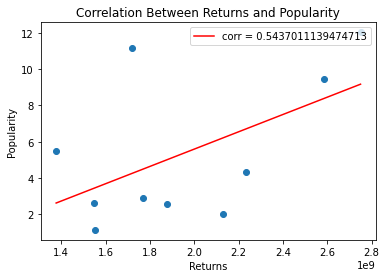

In [20]:
# Scatter plot of Returns and Popularity
x = df_top10['returns']
y = df_top10['popularity']
title ='Correlation Between Returns and Popularity'
x_label = 'Returns'
y_label = 'Popularity'

corr_plot(x, y, title, x_label, y_label)

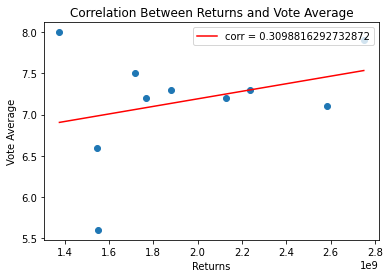

In [21]:
# Scatter plot of Returns and Vote average
x = df_top10['returns']
y = df_top10['vote_average']
title ='Correlation Between Returns and Vote Average'
x_label = 'Returns'
y_label = 'Vote Average'
corr_plot(x, y, title, x_label, y_label)

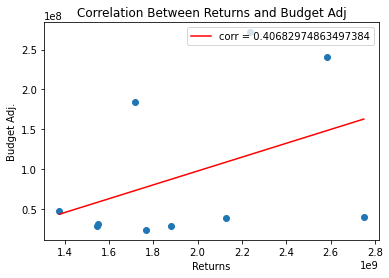

In [22]:
# Scatter plot of Returns and Budget_adj
x = df_top10['returns']
y = df_top10['budget_adj']
title ='Correlation Between Returns and Budget Adj'
x_label = 'Returns'
y_label = 'Budget Adj.'
corr_plot(x, y, title, x_label, y_label)

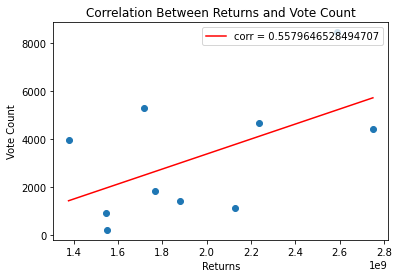

In [23]:
# Scatter plot of Returns and Vote count
x = df_top10['returns']
y = df_top10['vote_count']
title ='Correlation Between Returns and Vote Count'
x_label = 'Returns'
y_label = 'Vote Count'
corr_plot(x, y, title, x_label, y_label)

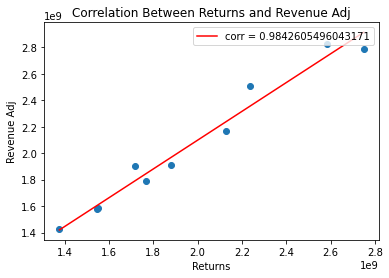

In [24]:
# Scatter plot of Returns and Revenue_adj
x = df_top10['returns']
y = df_top10['revenue_adj']
title ='Correlation Between Returns and Revenue Adj'
x_label = 'Returns'
y_label = 'Revenue Adj'
corr_plot(x, y, title, x_label, y_label)

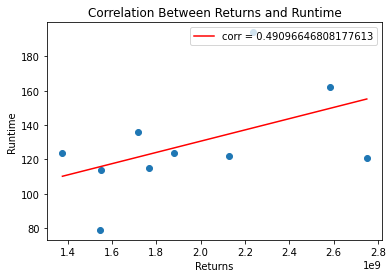

In [25]:
# Scatter plot of Returns and Runtime
x = df_top10['returns']
y = df_top10['runtime']
title ='Correlation Between Returns and Runtime'
x_label = 'Returns'
y_label = 'Runtime'
corr_plot(x, y, title, x_label, y_label)

<a id='1000'></a>
# TOP 1000

We are going to investigate the folllowing properties and see correlation they have with high earnings in movies(Top 1000):

* `` popularity ``
* `` vote_average ``
* `` vote_count ``
* `` budget_adj``
* `` revenue_adj``
* `` runtime ``


In [26]:
df_top1000.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,returns
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,29075.598000,2.155741,6.271133e+07,2.986500e+08,116.491000,1218.975000,6.483000,1998.396000,7.348528e+07,3.913854e+08,3.179001e+08
std,55902.283109,2.323532,5.871683e+07,2.561761e+08,29.111912,1355.295421,0.696661,13.177512,5.851688e+07,2.953603e+08,2.732800e+08
min,11.000000,0.044675,0.000000e+00,2.500000e+07,69.000000,10.000000,4.200000,1960.000000,0.000000e+00,1.113289e+08,1.113289e+08
25%,954.750000,0.949233,1.647500e+07,1.473242e+08,99.000000,304.000000,6.000000,1991.000000,2.830800e+07,2.058193e+08,1.510479e+08
50%,9036.000000,1.557851,4.500000e+07,2.224777e+08,113.000000,715.500000,6.500000,2001.000000,6.094353e+07,2.972425e+08,2.217477e+08
75%,20395.500000,2.604346,9.200000e+07,3.620530e+08,128.000000,1666.500000,7.000000,2009.000000,1.077646e+08,4.701839e+08,3.794305e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


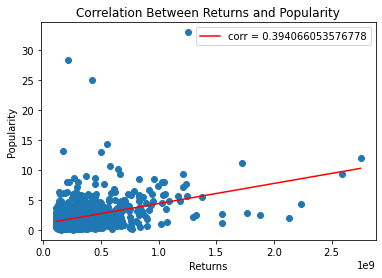

In [27]:
x = df_top1000['returns']
y = df_top1000['popularity']
title ='Correlation Between Returns and Popularity'
x_label = 'Returns'
y_label = 'Popularity'
corr_plot(x, y, title, x_label, y_label)

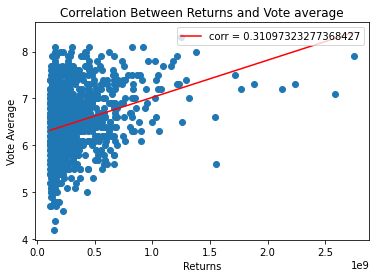

In [28]:
x = df_top1000['returns']
y = df_top1000['vote_average']
title ='Correlation Between Returns and Vote average'
x_label = 'Returns'
y_label = 'Vote Average'
corr_plot(x, y, title, x_label, y_label)

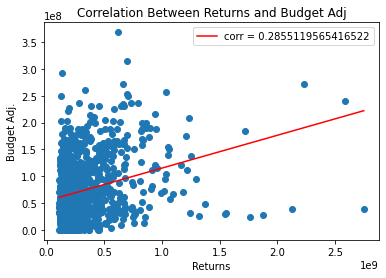

In [29]:
x = df_top1000['returns']
y = df_top1000['budget_adj']
title ='Correlation Between Returns and Budget Adj'
x_label = 'Returns'
y_label = 'Budget Adj.'
corr_plot(x, y, title, x_label, y_label)

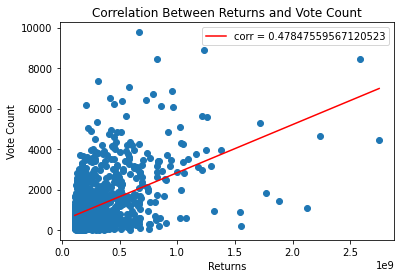

In [30]:
x = df_top1000['returns']
y = df_top1000['vote_count']
title ='Correlation Between Returns and Vote Count'
x_label = 'Returns'
y_label = 'Vote Count'
corr_plot(x, y, title, x_label, y_label)

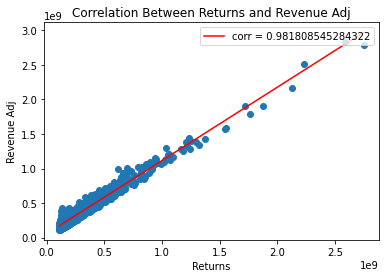

In [31]:
x = df_top1000['returns']
y = df_top1000['revenue_adj']
title ='Correlation Between Returns and Revenue Adj'
x_label = 'Returns'
y_label = 'Revenue Adj'
corr_plot(x, y, title, x_label, y_label)

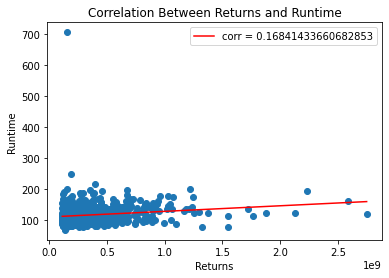

In [32]:
x = df_top1000['returns']
y = df_top1000['runtime']
title ='Correlation Between Returns and Runtime'
x_label = 'Returns'
y_label = 'Runtime'
corr_plot(x, y, title, x_label, y_label)

<a id='10000'></a>
# TOP 10000

We are going to investigate the folllowing properties and see correlation they have with high earnings in movies(Top 10000):

* `` popularity ``
* `` vote_average ``
* `` vote_count ``
* `` budget_adj``
* `` revenue_adj``
* `` runtime ``


In [33]:
df_top10000.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,returns
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04
mean,68730.515800,0.652988,1.275635e+07,4.248658e+07,101.326400,226.144300,5.994220,2001.44990,1.506371e+07,5.483343e+07,3.976972e+07
std,93816.752918,1.034945,3.025630e+07,1.214924e+08,31.128347,597.069098,0.940358,12.98847,3.317740e+07,1.501424e+08,1.285765e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.00000,0.000000e+00,0.000000e+00,-1.451532e+07
25%,10818.500000,0.201613,0.000000e+00,0.000000e+00,90.000000,16.000000,5.400000,1995.00000,0.000000e+00,0.000000e+00,0.000000e+00
50%,22251.000000,0.374939,0.000000e+00,0.000000e+00,98.000000,36.000000,6.000000,2006.00000,0.000000e+00,0.000000e+00,0.000000e+00
75%,80615.250000,0.712227,1.000000e+07,2.744392e+07,111.000000,147.250000,6.600000,2011.00000,1.310186e+07,3.791414e+07,1.873862e+07
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.00000,3.683713e+08,2.827124e+09,2.750137e+09


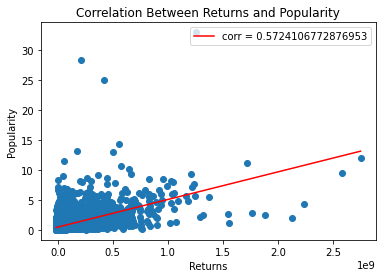

In [34]:
x = df_top10000['returns']
y = df_top10000['popularity']
title ='Correlation Between Returns and Popularity'
x_label = 'Returns'
y_label = 'Popularity'
corr_plot(x, y, title, x_label, y_label)

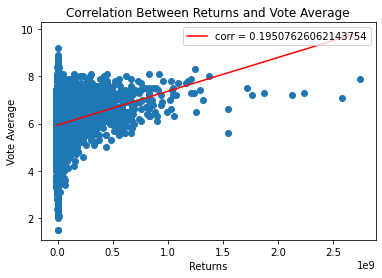

In [35]:
x = df_top10000['returns']
y = df_top10000['vote_average']
title ='Correlation Between Returns and Vote Average'
x_label = 'Returns'
y_label = 'Vote Average'
corr_plot(x, y, title, x_label, y_label)

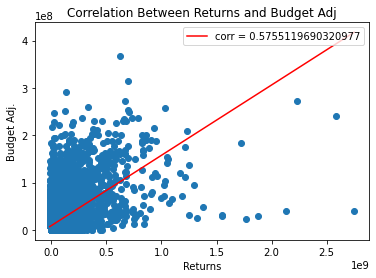

In [36]:
x = df_top10000['returns']
y = df_top10000['budget_adj']
title ='Correlation Between Returns and Budget Adj'
x_label = 'Returns'
y_label = 'Budget Adj.'
corr_plot(x, y, title, x_label, y_label)

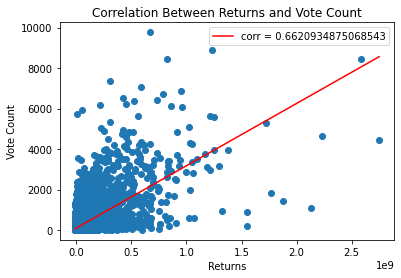

In [37]:
x = df_top10000['returns']
y = df_top10000['vote_count']
title ='Correlation Between Returns and Vote Count'
x_label = 'Returns'
y_label = 'Vote Count'
corr_plot(x, y, title, x_label, y_label)

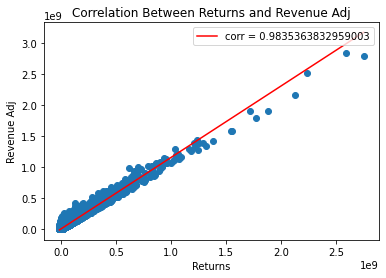

In [38]:
x = df_top10000['returns']
y = df_top10000['revenue_adj']
title ='Correlation Between Returns and Revenue Adj'
x_label = 'Returns'
y_label = 'Revenue Adj'
corr_plot(x, y, title, x_label, y_label)

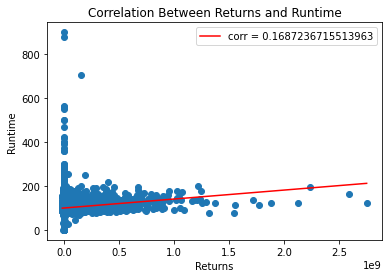

In [39]:
x = df_top10000['returns']
y = df_top10000['runtime']
title ='Correlation Between Returns and Runtime'
x_label = 'Returns'
y_label = 'Runtime'
corr_plot(x, y, title, x_label, y_label)

<a id='all'></a>
# ALL SORTED MOVIES

We are going to investigate the folllowing properties and see correlation they have with high earnings in all movies:

* `` popularity ``
* `` vote_average ``
* `` vote_count ``
* `` budget_adj``
* `` revenue_adj``
* `` runtime ``


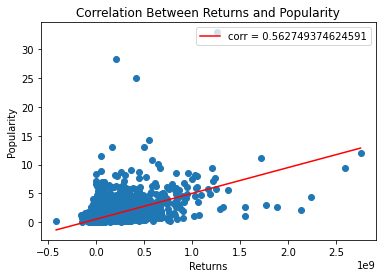

In [40]:
x = df_sorted['returns']
y = df_sorted['popularity']
title ='Correlation Between Returns and Popularity'
x_label = 'Returns'
y_label = 'Popularity'
corr_plot(x, y, title, x_label, y_label)

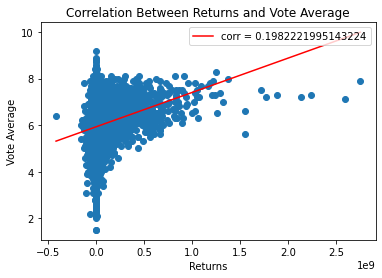

In [41]:
x = df_sorted['returns']
y = df_sorted['vote_average']
title ='Correlation Between Returns and Vote Average'
x_label = 'Returns'
y_label = 'Vote Average'
corr_plot(x, y, title, x_label, y_label)

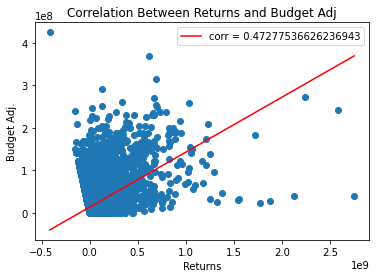

In [42]:
x = df_sorted['returns']
y = df_sorted['budget_adj']
title ='Correlation Between Returns and Budget Adj'
x_label = 'Returns'
y_label = 'Budget Adj.'
corr_plot(x, y, title, x_label, y_label)

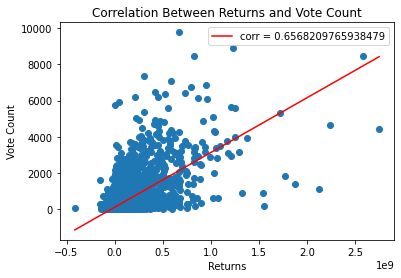

In [43]:
x = df_sorted['returns']
y = df_sorted['vote_count']
title ='Correlation Between Returns and Vote Count'
x_label = 'Returns'
y_label = 'Vote Count'
corr_plot(x, y, title, x_label, y_label)

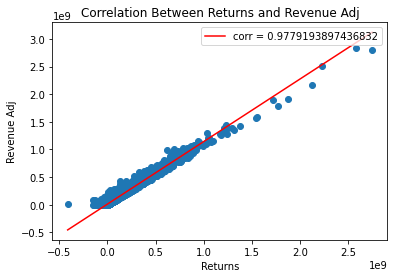

In [44]:
x = df_sorted['returns']
y = df_sorted['revenue_adj']
title ='Correlation Between Returns and Revenue Adj'
x_label = 'Returns'
y_label = 'Revenue Adj'
corr_plot(x, y, title, x_label, y_label)

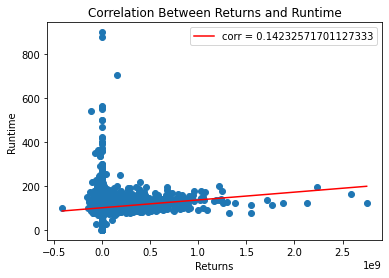

In [45]:
x = df_sorted['returns']
y = df_sorted['runtime']
title ='Correlation Between Returns and Runtime'
x_label = 'Returns'
y_label = 'Runtime'
corr_plot(x, y, title, x_label, y_label)

In [46]:
x = df_sorted['returns']
y = df_sorted['runtime']

print(y.corr(x))

0.14232571701127333


<a id='conclusions'></a>
## Conclusions

   After we have checked the properties in the data set, we have found out that:
   
   * `` popularity``
   * `` vote_average ``
   * `` vote_count ``
   * `` revenue_adj``
        
are good indicators of high earning movies since it show how the fans of the movies have recieved it.
    
   We also experiences limitation such as:
   > **1**: Not all rows of genres and imdb_id we filled and thus, we had to drop them, they may be small but when analysing earnings/returns, each movie has a specific amount associated with it.
        

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255